In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from google.colab import files

uploaded = files.upload() #test
for fn in uploaded.keys():
  print("User uploaded file \"{name}\" with length {length} bytes"\
        .format(name = fn, length=len(uploaded[fn])))

Saving data.csv to data (1).csv
User uploaded file "data.csv" with length 1286 bytes


In [60]:
data_sepal = pd.read_csv("data.csv")
print(data)

     Sepal width  Sepal length
0            5.1           3.5
1            4.9           3.0
2            4.7           3.2
3            4.6           3.1
4            5.0           3.6
..           ...           ...
145          6.7           3.0
146          6.3           2.5
147          6.5           3.0
148          6.2           3.4
149          5.9           3.0

[150 rows x 2 columns]


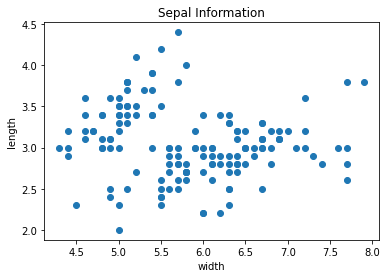

In [51]:
sepal_width = data["Sepal width"]
sepal_length = data["Sepal length"]

plt.plot(sepal_width, sepal_length, 'o')
plt.xlabel("width")
plt.ylabel("length")
plt.title("Sepal Information")
plt.show()

In [57]:
LIMITION = 900

class K_means:
  def __init__(self, k, data, iteration):
    self.k = k
    self.data = data
    self.iteration = iteration
  def Centroids(self, ):
    data = self.data.to_numpy()
    idx = np.random.randint(int(np.size(data,0)), size = int(self.k))
    sampled_cen = data[idx, : ]
    return sampled_cen
  def get_UD(self, data, centroids, clusters):
    for ins in data:
      mu = min([(i[0], np.linalg.norm(ins-centroids[i[0]])) \
                for i in enumerate(centroids)], key=lambda t:t[1])[0]
      try:
        clusters[mu].append(ins)
      except KeyError:
        clusters[mu] = [ins]
    for result in clusters:
      if not result:
        result.append(data[np.random.randint(0, len(data), size =1)].flatten().tolist())
    return clusters
  def Assignment(self, ):
    data = self.data.to_numpy()
    cen = self.Centroids()
    prev_centro = [[] for i in range(self.k)]
    iters = 0
    while self.Update(cen, prev_centro, iters) is not True:
      iters = iters + 1
      clusters = [[]for i in range(self.k)]
      old_result = [[]for i in range(self.k)]
      clusters = self.get_UD(data, cen, clusters)
      idx = 0
      for result in clusters:
        prev_centro[idx] = cen[idx]
        cen[idx] = np.mean(result, axis=0).tolist()
        idx = idx + 1
      if np.array_equal(old_result, result) is True:
        iters = 0
      iteration = self.iteration
      old_result = result
    return clusters, iteration
  def Update(self, centroids, prev_centro, iters):
    if iters > LIMITION:
      return True
    return prev_centro == centroids
  def Train(self, ):
    iteration = 0
    result, iteration = self.Assignment()
    self.iteration = iteration
    return result

In [62]:
def Show_Kmeans(k, data, iteration =1000):
  colorlist = ['r','c','k','g','m','b','y']
  data = pd.read_csv("data.csv")
  model1 = K_means(k=k, data = data, iteration = 1000)
  clusters = model1.Train()
  result = []

  for i in range(k):
    result = np.array(clusters[i])
    result_x = result[:,0]
    result_y = result[:,1]
    plt.scatter(result_x, result_y, c=str((colorlist[i])))
    
  plt.xlabel("Sepal Length(cm)")
  plt.ylabel("Sepal Width(cm)")
  plt.title("Implementation")
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


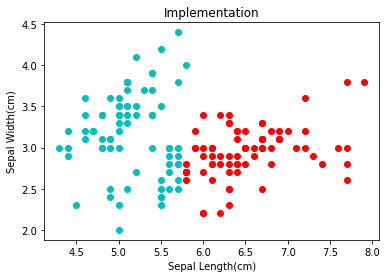

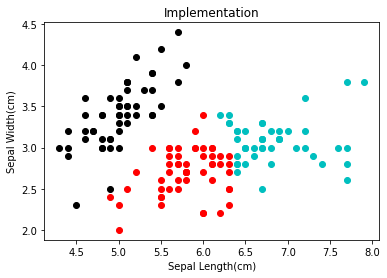

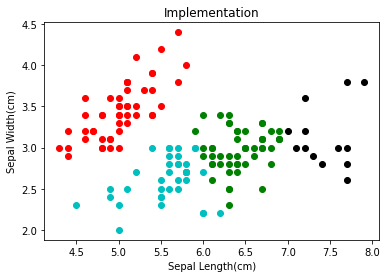

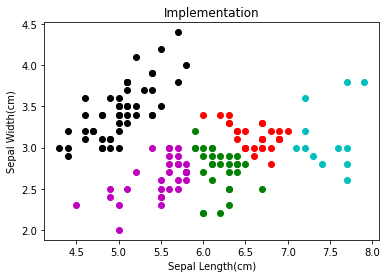

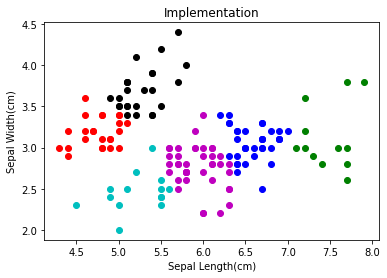

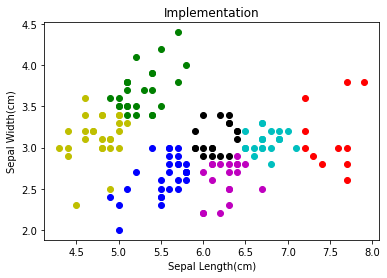

In [65]:
for i in range(2,8):
  Show_Kmeans(i, data_sepal)